In [1]:
%run ../MLHCExperiment-Common-Val17Test18.ipynb

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
all_visits = read_data()
all_visits = all_visits.where(all_visits["AdjCount"] > 0).dropna()

In [3]:
all_visits.index = pd.to_datetime(all_visits.index)

In [4]:
def constant_class(c):
    if c['isHoliday'] == 1 or c['isSaturday'] == 1 or c['isSunday'] == 1:
        return 0
    elif c['isWinter'] == 1:
        return 1
    elif c['isSpring'] == 1:
        return 2
    elif c['isSummer'] == 1:
        return 3
    else: # Autumn
        return 4
    
all_visits['constant_class'] = all_visits.apply(constant_class, axis=1)

def filter_label(x, label, const_class):
    return x.loc[TRAIN_START:TRAIN_END][label].where(x["constant_class"]==const_class).dropna()

wknd_holiday_avg = np.mean(filter_label(all_visits, "AdjCount", 0))
winter_avg = np.mean(filter_label(all_visits, "AdjCount", 1))
spring_avg = np.mean(filter_label(all_visits, "AdjCount", 2))
summer_avg = np.mean(filter_label(all_visits, "AdjCount", 3))
autumn_avg = np.mean(filter_label(all_visits, "AdjCount", 4))

wknd_holiday_avg_icd8 = np.mean(filter_label(all_visits, ICD8_LABEL, 0))
winter_avg_icd8 = np.mean(filter_label(all_visits, ICD8_LABEL, 1))
spring_avg_icd8 = np.mean(filter_label(all_visits, ICD8_LABEL, 2))
summer_avg_icd8 = np.mean(filter_label(all_visits, ICD8_LABEL, 3))
autumn_avg_icd8 = np.mean(filter_label(all_visits, ICD8_LABEL, 4))

wknd_holiday_avg_icd8opp = np.mean(filter_label(all_visits, ICD8OPP_LABEL, 0))
winter_avg_icd8opp = np.mean(filter_label(all_visits, ICD8OPP_LABEL, 1))
spring_avg_icd8opp = np.mean(filter_label(all_visits, ICD8OPP_LABEL, 2))
summer_avg_icd8opp = np.mean(filter_label(all_visits, ICD8OPP_LABEL, 3))
autumn_avg_icd8opp = np.mean(filter_label(all_visits, ICD8OPP_LABEL, 4))

def pred_constant(c):
    if c['constant_class'] == 0:
        return wknd_holiday_avg
    elif c['constant_class'] == 1:
        return winter_avg
    elif c['constant_class'] == 2:
        return spring_avg
    elif c['constant_class'] == 3:
        return summer_avg
    else:
        return autumn_avg
    
def pred_constant_icd8(c):
    if c['constant_class'] == 0:
        return wknd_holiday_avg_icd8
    elif c['constant_class'] == 1:
        return winter_avg_icd8
    elif c['constant_class'] == 2:
        return spring_avg_icd8
    elif c['constant_class'] == 3:
        return summer_avg_icd8
    else:
        return autumn_avg_icd8
    
def pred_constant_icd8opp(c):
    if c['constant_class'] == 0:
        return wknd_holiday_avg_icd8opp
    elif c['constant_class'] == 1:
        return winter_avg_icd8opp
    elif c['constant_class'] == 2:
        return spring_avg_icd8opp
    elif c['constant_class'] == 3:
        return summer_avg_icd8opp
    else:
        return autumn_avg_icd8opp
    
all_visits['y_pred'] = all_visits.apply(pred_constant, axis=1)
all_visits['y_pred_icd8'] = all_visits.apply(pred_constant_icd8, axis=1)
all_visits['y_pred_icd8opp'] = all_visits.apply(pred_constant_icd8opp, axis=1)

In [5]:
y_actual = all_visits.loc[TEST_START:]["AdjCount"]
y_pred = all_visits.loc[TEST_START:]["y_pred"]

y_actual_icd8 = all_visits.loc[TEST_START:][ICD8_LABEL]
y_pred_icd8 = all_visits.loc[TEST_START:]["y_pred_icd8"]

y_actual_icd8opp = all_visits.loc[TEST_START:][ICD8OPP_LABEL]
y_pred_icd8opp = all_visits.loc[TEST_START:]["y_pred_icd8opp"]

In [6]:
print("Mean squared error: %.3f" % mean_squared_error(y_actual, y_pred))
print("Root mean squared error: %.3f" % np.sqrt(mean_squared_error(y_actual, y_pred)))

print("Mean squared error: %.3f" % mean_squared_error(y_actual_icd8, y_pred_icd8))
print("Root mean squared error: %.3f" % np.sqrt(mean_squared_error(y_actual_icd8, y_pred_icd8)))

print("Mean squared error: %.3f" % mean_squared_error(y_actual_icd8opp, y_pred_icd8opp))
print("Root mean squared error: %.3f" % np.sqrt(mean_squared_error(y_actual_icd8opp, y_pred_icd8opp)))

Mean squared error: 2.447
Root mean squared error: 1.564
Mean squared error: 0.671
Root mean squared error: 0.819
Mean squared error: 1.095
Root mean squared error: 1.046


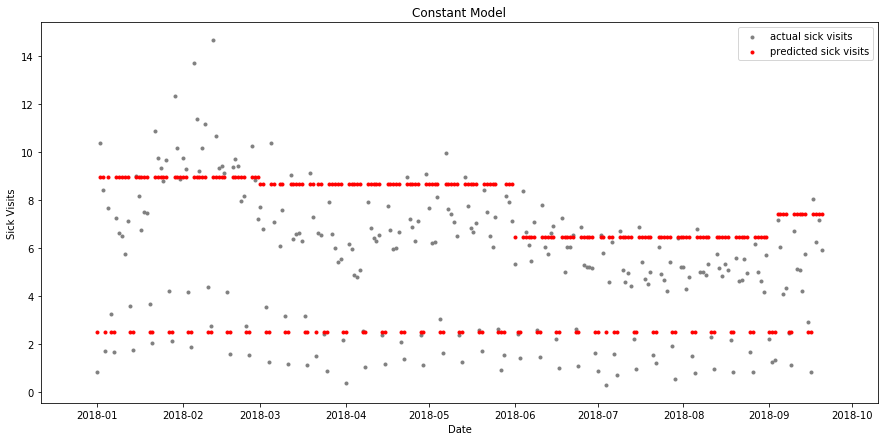

In [7]:
fig, ax = plt.subplots(figsize=(15,7))
    
plt.scatter(all_visits.loc[TEST_START:].index, y_actual, marker='.', color='gray', label='actual sick visits')
plt.scatter(all_visits.loc[TEST_START:].index, y_pred, marker='.', color='red', label='predicted sick visits')
plt.legend(loc=1)
plt.title("Constant Model")
plt.xlabel("Date")
plt.ylabel("Sick Visits")
plt.show()